# <font color = #32CD32> Part 1 - Business Understanding</font>

### __Problem Statement:__ The objective of this project is __to understand and predict the persistency of a drug prescribed by physicians__. Persistency, in this context, refers to whether a patient, based on his/her information, will follow the prescribed medication regimen over a certain period.

### Identifying factors that influence persistency is crucial for pharmaceutical companies to improve patient outcomes, reduce healthcare costs, and enhance their product offerings.

# <font color = #32CD32> Part 2 - Data Understanding</font>

## 2.1. Import libraries

In [40]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix

plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

## 2.2. Read Dataset

In [2]:
df = pd.read_excel('Healthcare_dataset.xlsx')
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


## 2.3. Data Understanding

* ### 2.3.1. Number of observations and features

In [3]:
print(f'Number of Observations: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Observations: 3424
Number of Features: 69


* ### 2.3.2. Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

> #### Column 'Persistency_Flag' is a target

* ### 2.3.3. Description

In [5]:
# numerical columns
df.describe(include=['int64'])

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [6]:
# categorical columns
df.describe(exclude=['int64'])

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls
count,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,...,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424
unique,3424,2,2,4,3,5,4,36,2,3,...,2,2,2,2,2,2,2,2,2,2
top,P3408,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,N
freq,1,2135,3230,3148,3235,1383,1439,1535,2013,2104,...,3406,3066,3382,1788,3232,3357,3370,3413,3410,3355


* ### 2.3.4. Check for duplicated values

In [7]:
print(f"Number of duplicates: {df.duplicated().sum()}")

Number of duplicates: 0


* ### 2.3.5. Check for unique values

In [5]:
unique_values = {}

for col in df.columns:
    unique_values[col] = df[col].unique()

In [6]:
unique_values

{'Ptid': array(['P1', 'P2', 'P3', ..., 'P3422', 'P3423', 'P3424'], dtype=object),
 'Persistency_Flag': array(['Persistent', 'Non-Persistent'], dtype=object),
 'Gender': array(['Male', 'Female'], dtype=object),
 'Race': array(['Caucasian', 'Asian', 'Other/Unknown', 'African American'],
       dtype=object),
 'Ethnicity': array(['Not Hispanic', 'Hispanic', 'Unknown'], dtype=object),
 'Region': array(['West', 'Midwest', 'South', 'Other/Unknown', 'Northeast'],
       dtype=object),
 'Age_Bucket': array(['>75', '55-65', '65-75', '<55'], dtype=object),
 'Ntm_Speciality': array(['GENERAL PRACTITIONER', 'Unknown', 'ENDOCRINOLOGY', 'RHEUMATOLOGY',
        'ONCOLOGY', 'PATHOLOGY', 'OBSTETRICS AND GYNECOLOGY',
        'PSYCHIATRY AND NEUROLOGY', 'ORTHOPEDIC SURGERY',
        'PHYSICAL MEDICINE AND REHABILITATION',
        'SURGERY AND SURGICAL SPECIALTIES', 'PEDIATRICS',
        'PULMONARY MEDICINE', 'HEMATOLOGY & ONCOLOGY', 'UROLOGY',
        'PAIN MEDICINE', 'NEUROLOGY', 'RADIOLOGY', 'GASTROENT

* ### 2.3.6. Check for NaN values

In [10]:
print(f"Number of NaNs: {df.isna().sum().sum()}")

Number of NaNs: 0


> #### There are no NaN values. But as we can see above, there are 8 columns with __'Unknown' or 'Other/Unknown' categories__. Let's take a closer look at each such column and see how we can replace them.

#### 1. Race

In [11]:
# describe
df['Race'].describe()

count          3424
unique            4
top       Caucasian
freq           3148
Name: Race, dtype: object

In [12]:
# value counts
df['Race'].value_counts()

Race
Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: count, dtype: int64

#### 2. Ethnicity

In [15]:
# describe
df['Ethnicity'].describe()

count             3424
unique               3
top       Not Hispanic
freq              3235
Name: Ethnicity, dtype: object

In [16]:
# value counts
df['Ethnicity'].value_counts()

Ethnicity
Not Hispanic    3235
Hispanic          98
Unknown           91
Name: count, dtype: int64

#### 3. Region

In [17]:
# describe
df['Region'].describe()

count        3424
unique          5
top       Midwest
freq         1383
Name: Region, dtype: object

In [18]:
# value counts
df['Region'].value_counts()

Region
Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: count, dtype: int64

#### 4. Ntm_Speciality

In [19]:
# describe
df['Ntm_Speciality'].describe()

count                     3424
unique                      36
top       GENERAL PRACTITIONER
freq                      1535
Name: Ntm_Speciality, dtype: object

In [20]:
# value counts
df['Ntm_Speciality'].value_counts()

Ntm_Speciality
GENERAL PRACTITIONER                                              1535
RHEUMATOLOGY                                                       604
ENDOCRINOLOGY                                                      458
Unknown                                                            310
ONCOLOGY                                                           225
OBSTETRICS AND GYNECOLOGY                                           90
UROLOGY                                                             33
ORTHOPEDIC SURGERY                                                  30
CARDIOLOGY                                                          22
PATHOLOGY                                                           16
OTOLARYNGOLOGY                                                      14
HEMATOLOGY & ONCOLOGY                                               14
PEDIATRICS                                                          13
PHYSICAL MEDICINE AND REHABILITATION                          

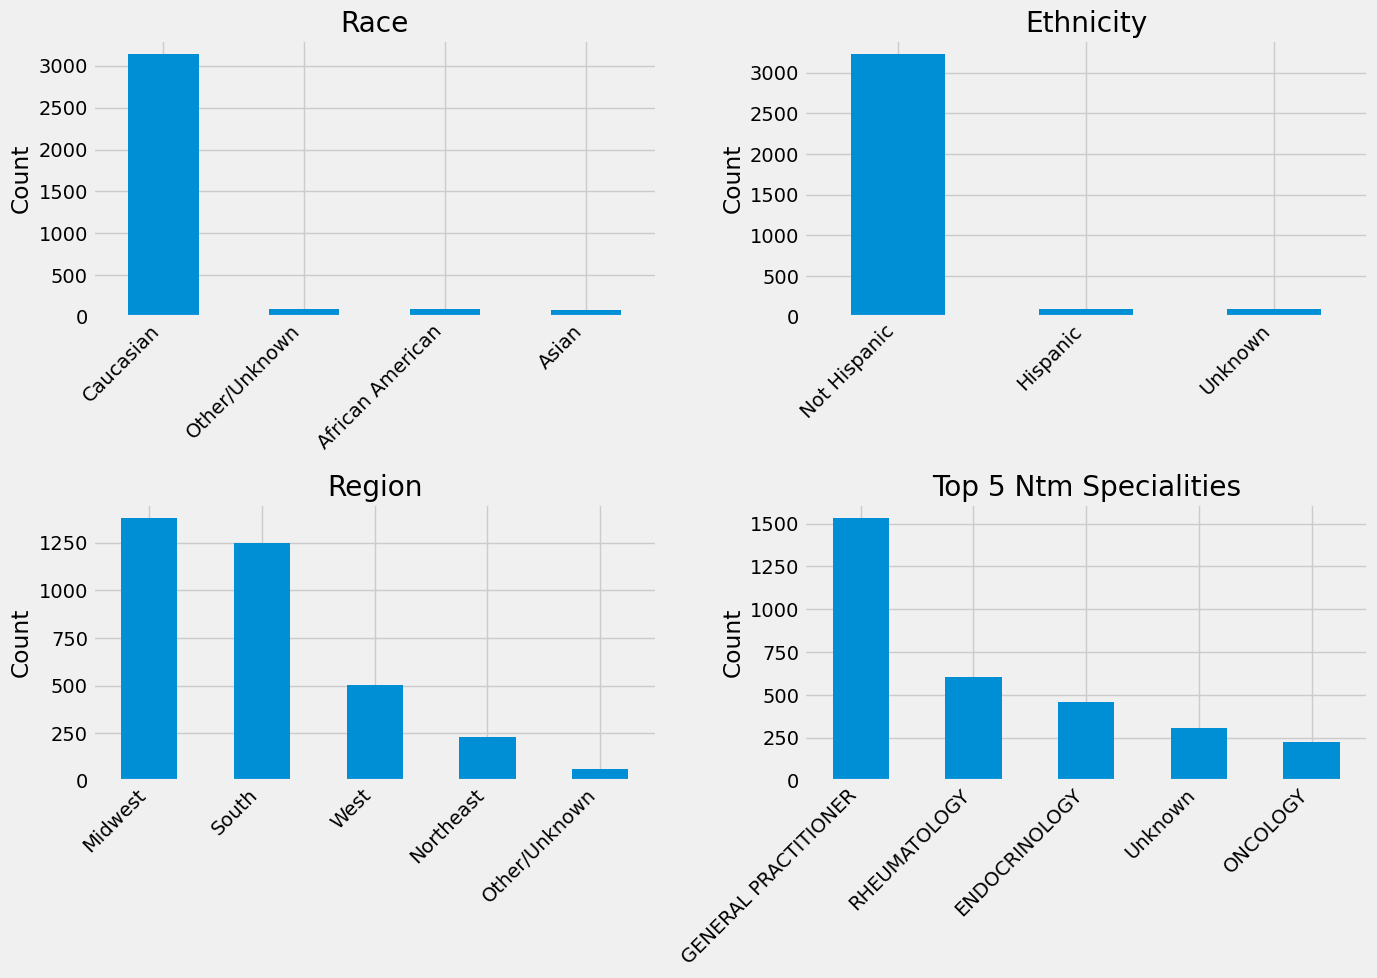

In [6]:
# top 5 categories of 'Ntm_Speciality'
top_5_specialities = df['Ntm_Speciality'].value_counts().head(5)

# other columns
columns_to_plot = ['Race', 'Ethnicity', 'Region']

_, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot 'Race', 'Ethnicity', and 'Region'
for ax, column in zip(axes.flatten()[:3], columns_to_plot):
    df[column].value_counts().plot(kind='bar', ax=ax, title=column)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Plot top 5 'Ntm_Speciality'
top_5_specialities.plot(kind='bar', ax=axes.flatten()[3], title='Top 5 Ntm Specialities')
axes.flatten()[3].set_xlabel('')
axes.flatten()[3].set_ylabel('Count')
axes.flatten()[3].set_xticklabels(axes.flatten()[3].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

> #### For __'Race'__ and __'Ethnicity'__ columns, we will replace the Unknown category with the corresponding __mode value__, since unknown values make up a small percentage of the data and this will be quite safe.
> #### For __'Region'__ column we will use Region mode for 'Not Hispanic', because only 1.75% missing values and 100% of them are of Ethnicity 'Not Hispanic'.
> #### For __'Ntm_Speciality'__ we will try 2 approaches:
> ##### 1. keeping unknowns as a category since it accounts for less than 9.05% of data and see how it relates to other variables.
> ##### 2. using of mode as substitution

#### 5. Risk_Segment_During_Rx

In [22]:
# describe
df['Risk_Segment_During_Rx'].describe()

count        3424
unique          3
top       Unknown
freq         1497
Name: Risk_Segment_During_Rx, dtype: object

In [23]:
# value counts
df['Risk_Segment_During_Rx'].value_counts()

Risk_Segment_During_Rx
Unknown    1497
HR_VHR      965
VLR_LR      962
Name: count, dtype: int64

#### 6. Tscore_Bucket_During_Rx

In [24]:
# describe
df['Tscore_Bucket_During_Rx'].describe()

count        3424
unique          3
top       Unknown
freq         1497
Name: Tscore_Bucket_During_Rx, dtype: object

In [25]:
# value counts
df['Tscore_Bucket_During_Rx'].value_counts()

Tscore_Bucket_During_Rx
Unknown    1497
<=-2.5     1017
>-2.5       910
Name: count, dtype: int64

#### 7. Change_T_Score

In [26]:
# describe
df['Change_T_Score'].describe()

count          3424
unique            4
top       No change
freq           1660
Name: Change_T_Score, dtype: object

In [27]:
# value counts
df['Change_T_Score'].value_counts()

Change_T_Score
No change    1660
Unknown      1497
Worsened      173
Improved       94
Name: count, dtype: int64

#### 8. Change_Risk_Segment

In [28]:
# describe
df['Change_Risk_Segment'].describe()

count        3424
unique          4
top       Unknown
freq         2229
Name: Change_Risk_Segment, dtype: object

In [29]:
# value counts
df['Change_Risk_Segment'].value_counts()

Change_Risk_Segment
Unknown      2229
No change    1052
Worsened      121
Improved       22
Name: count, dtype: int64

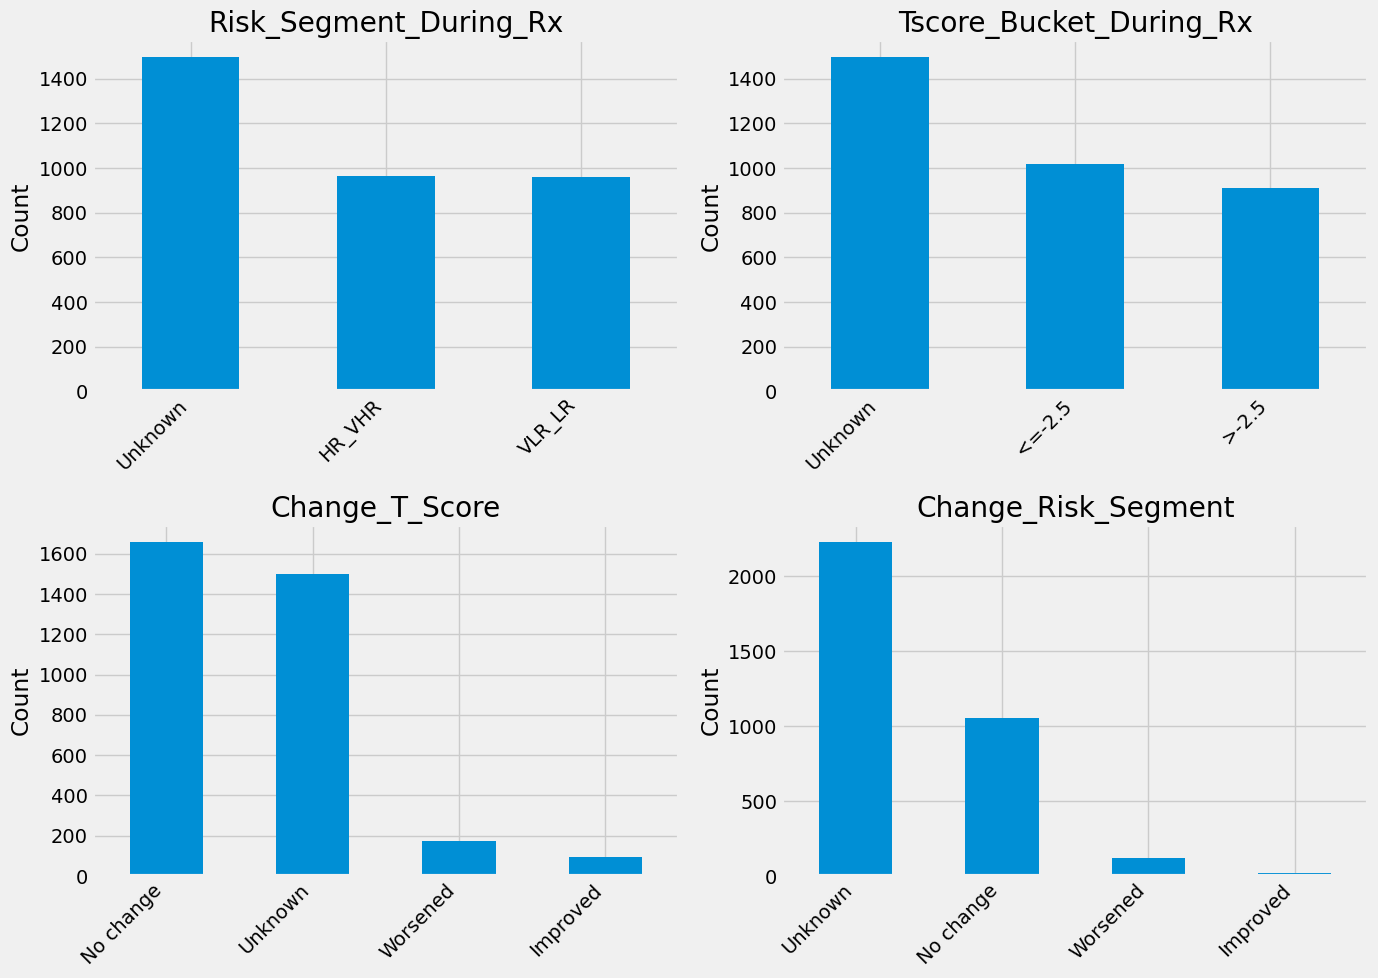

In [7]:
columns_to_plot = ['Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment']

_, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot columns
for ax, column in zip(axes.flatten(), columns_to_plot):
    df[column].value_counts().plot(kind='bar', ax=ax, title=column)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


plt.tight_layout()
plt.show()

> #### All these features have more than 40% missing values, consequently they will be __eliminated__.

* ### 2.3.7. Check for outliers

In [3]:
numerical_columns = df.select_dtypes(include=[np.number]).columns.to_list()

numerical_columns

['Dexa_Freq_During_Rx', 'Count_Of_Risks']

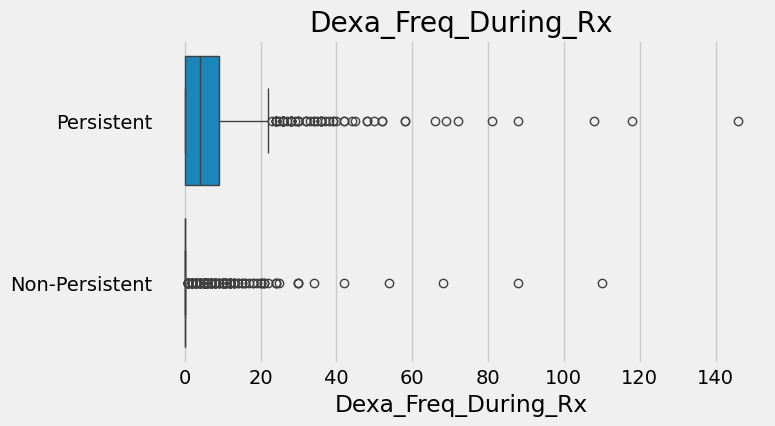

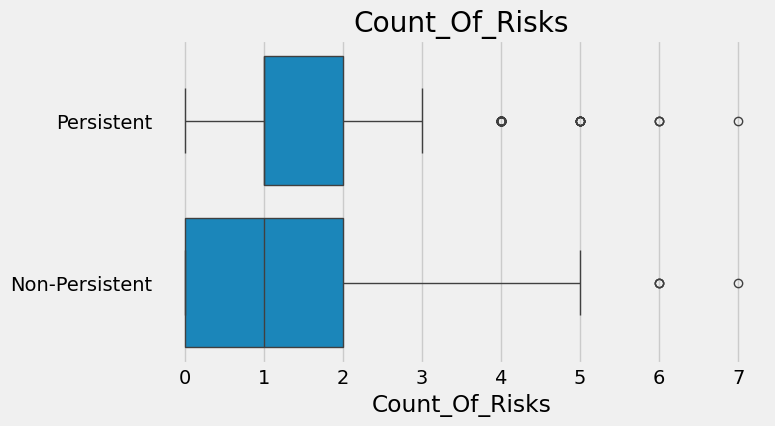

In [13]:
for col in numerical_columns:
    plt.figure(figsize=(7,4))
    sns.boxplot(data=df, x=col, y='Persistency_Flag')
    plt.ylabel('')
    plt.title(col)
    plt.show()

> #### We have only 2 numerical features and both of them have outliers. We will handle them using __IQR method__.

# <font color = #32CD32> Part 3 - Data Preparation</font>

## 3.1. Data cleaning and transformation

In [14]:
# Detect and remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [15]:
for column in numerical_columns:
    df = remove_outliers(df, column)

In [17]:
# Transformation for 'Tscore_Bucket_During_Rx' using Prior value
df['Tscore_Bucket_During_Rx'] = np.where(df['Tscore_Bucket_During_Rx'] == 'Unknown', df['Tscore_Bucket_Prior_Ntm'], df['Tscore_Bucket_During_Rx'])

In [18]:
# For 'Ntm_Speciality' group rare categories as OTHER
df['Ntm_Speciality'] = df['Ntm_Speciality'].mask(
    df['Ntm_Speciality'].map(df['Ntm_Speciality'].value_counts(normalize=True)) < 0.01, 'OTHER')

In [19]:
# Elimination of features with more than 40% missing values
df.drop(columns=['Risk_Segment_During_Rx', 'Change_T_Score', 'Change_Risk_Segment'], inplace=True)

In [20]:
# Replace the values "Unknown" and "Other/Unknown" with NaN
df.replace(['Other/Unknown', 'Unknown'], np.nan, inplace=True)

In [21]:
# Fill in the missing values with the most frequent values (mode) in the columns
for column in df.columns:
    if df[column].dtype == 'object': # only for categorical columns
        df[column].fillna(df[column].mode()[0], inplace=True)

In [22]:
# remove non-informative features
df.drop(columns=['Ptid'], inplace=True)

In [23]:
# save cleaned data to csv file
df.to_csv('cleaned_dataset.csv', index=False, header=True)

In [2]:
df = pd.read_csv('cleaned_dataset.csv')

In [3]:
df.head()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
2,Non-Persistent,Female,Caucasian,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,Y,N,N,N,N,N,N,N,2
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,1
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,...,N,N,N,N,N,N,N,N,N,1


## 3.2. Exploratory Data Analysis

* #### Target column

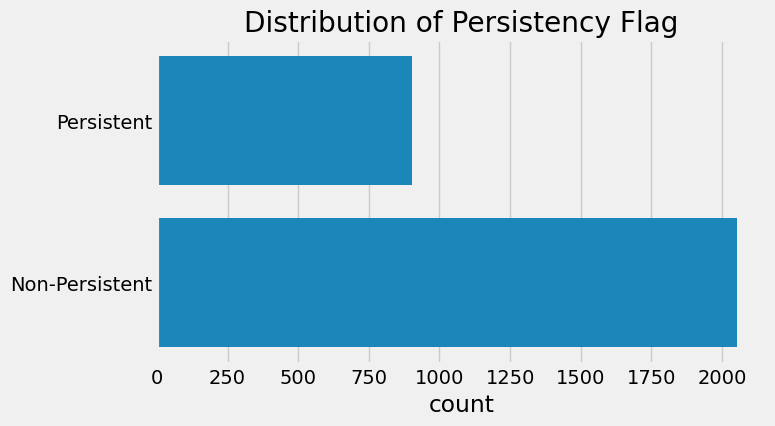

In [13]:
# Distribution of the target column
plt.figure(figsize=(7, 4))
sns.countplot(y='Persistency_Flag', data=df)
plt.title('Distribution of Persistency Flag')
plt.ylabel('')
plt.show()

> #### Significantly more patients are into the Non-Persistent group compared to the Persistent group.

* #### Numerical columns

##### Dexa_Freq_During_Rx

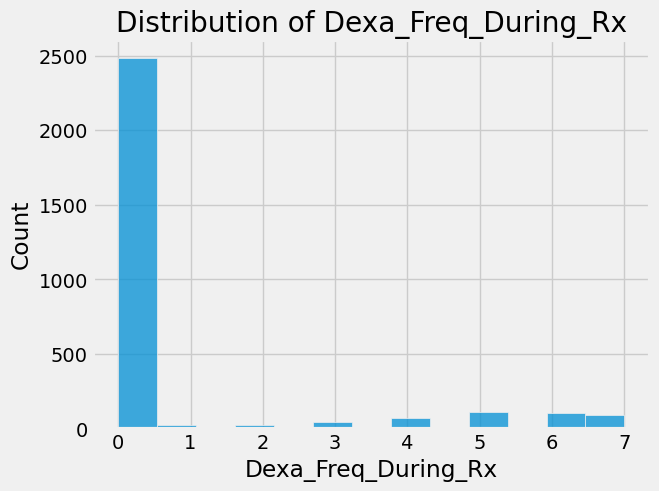

In [134]:
# Distribution
sns.histplot(df['Dexa_Freq_During_Rx'])
plt.title("Distribution of Dexa_Freq_During_Rx")
plt.show()

> #### Most patients did not have DEXA scans during treatment.

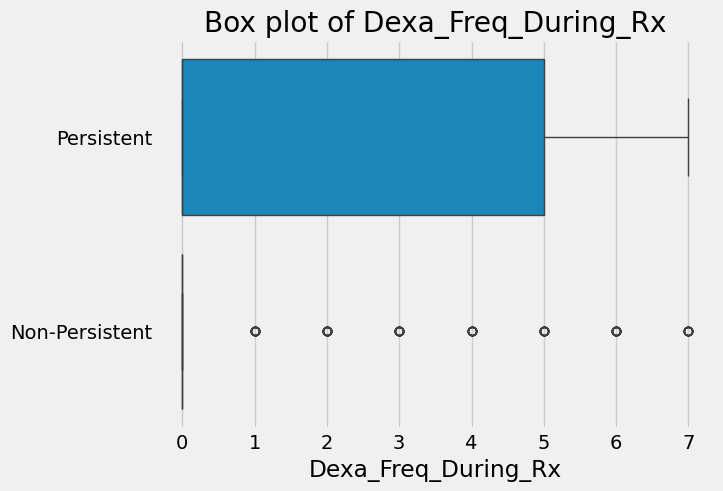

In [137]:
# Box plot
sns.boxplot(y='Persistency_Flag', x='Dexa_Freq_During_Rx', data=df)
plt.title("Box plot of Dexa_Freq_During_Rx")
plt.ylabel('')
plt.show()

> #### In the Persistent group, patients have DEXA scans more often and do so with varying frequency.
> #### For the Non-Persistent group, DEXA frequency values are mostly concentrated around zero, i.e. most patients do not have DEXA scans.

##### Count_Of_Risks

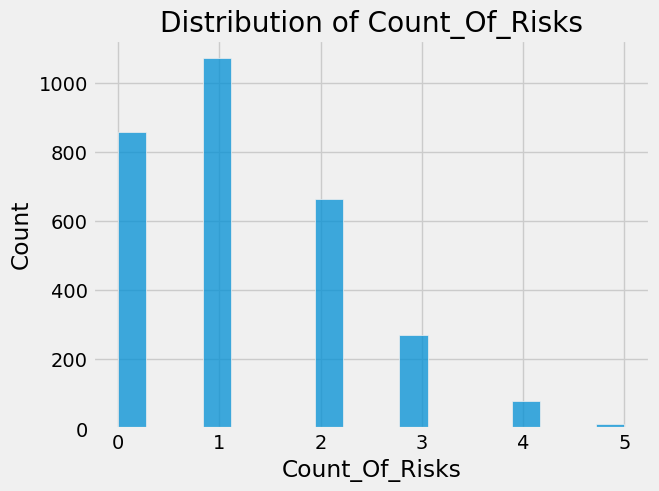

In [135]:
# Distribution
sns.histplot(df['Count_Of_Risks'])
plt.title("Distribution of Count_Of_Risks")
plt.show()

> #### Most patients have 0 to 2 risks, with the highest frequency at 1 risk.

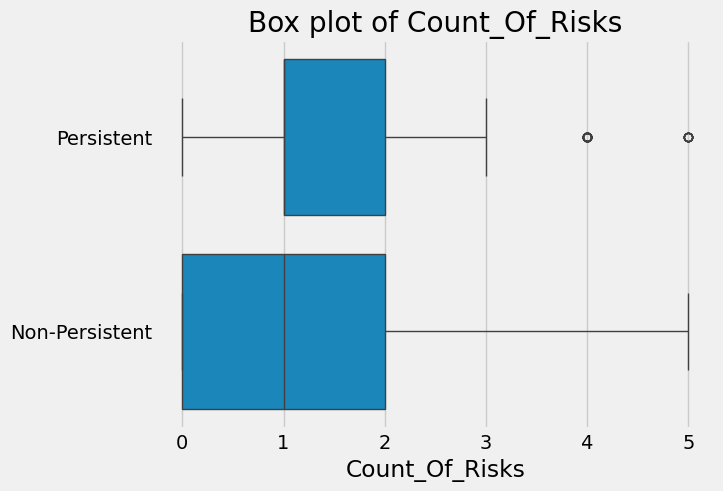

In [138]:
# Box plot
sns.boxplot(y='Persistency_Flag', x='Count_Of_Risks', data=df)
plt.title("Box plot of Count_Of_Risks")
plt.ylabel('')
plt.show()

> #### The median value of the number of risks for both Persistent and Non-Persistent groups is 1. However, the interquartile range and range of values for Non-Persistent is significantly larger compared to the Persistent group.

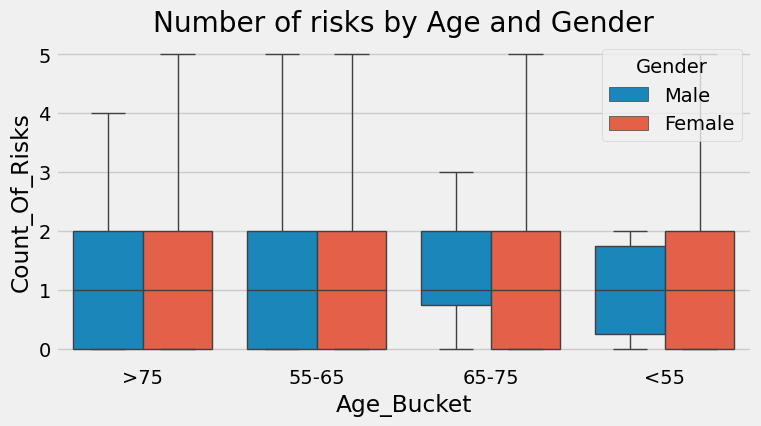

In [157]:
# Analysis of the number of risks depending on age and gender
plt.figure(figsize=(8, 4))
sns.boxplot(x='Age_Bucket', y='Count_Of_Risks', hue='Gender', data=df)
plt.title('Number of risks by Age and Gender')
plt.show()

> #### The median number of risks is approximately the same for all age groups and genders, with a slight variation in values.

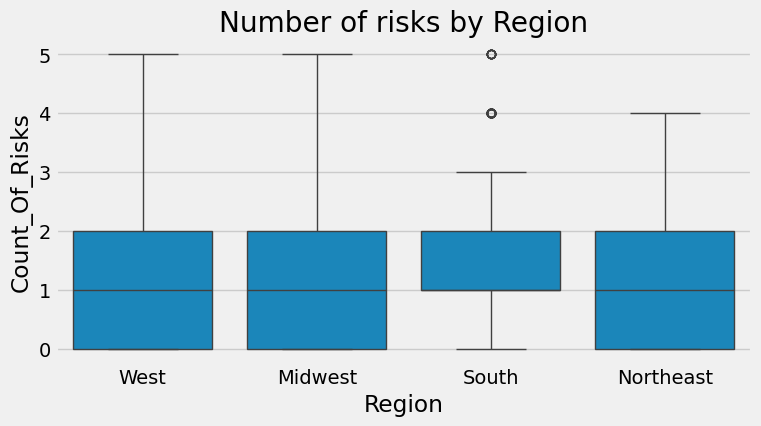

In [158]:
# Analysis of the number of risks depending on region
plt.figure(figsize=(8, 4))
sns.boxplot(x='Region', y='Count_Of_Risks', data=df)
plt.title('Number of risks by Region')
plt.show()

> #### In all regions, the median number of risks is about 1, with small differences in the rage of values.

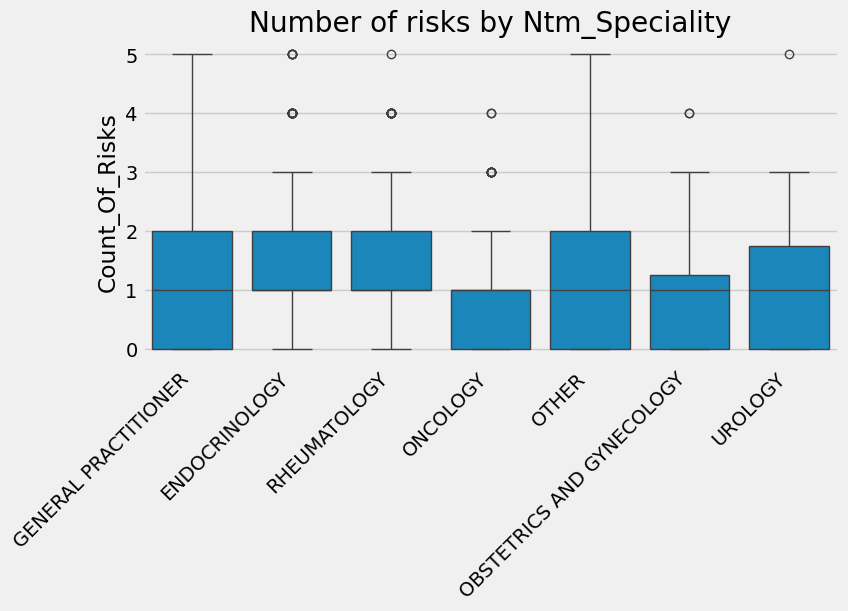

In [167]:
# Analysis of the number of risks depending on Ntm_Speciality
plt.figure(figsize=(8, 4))
sns.boxplot(x='Ntm_Speciality', y='Count_Of_Risks', data=df)
plt.title('Number of risks by Ntm_Speciality')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.show()

> #### The median number of risks for all medical specialties is about 1, with a wider range of values for some specialties such as RHEUMATOLOGY and OBSTETRICS AND GYNECOLOGY.

* #### Categorical columns

In [22]:
# Choose several categorical columns to plot
categorical_columns = ['Gender','Race','Ethnicity','Region', 'Age_Bucket', 'Ntm_Speciality',
                       'Tscore_Bucket_Prior_Ntm', 'Adherent_Flag','Count_Of_Risks']

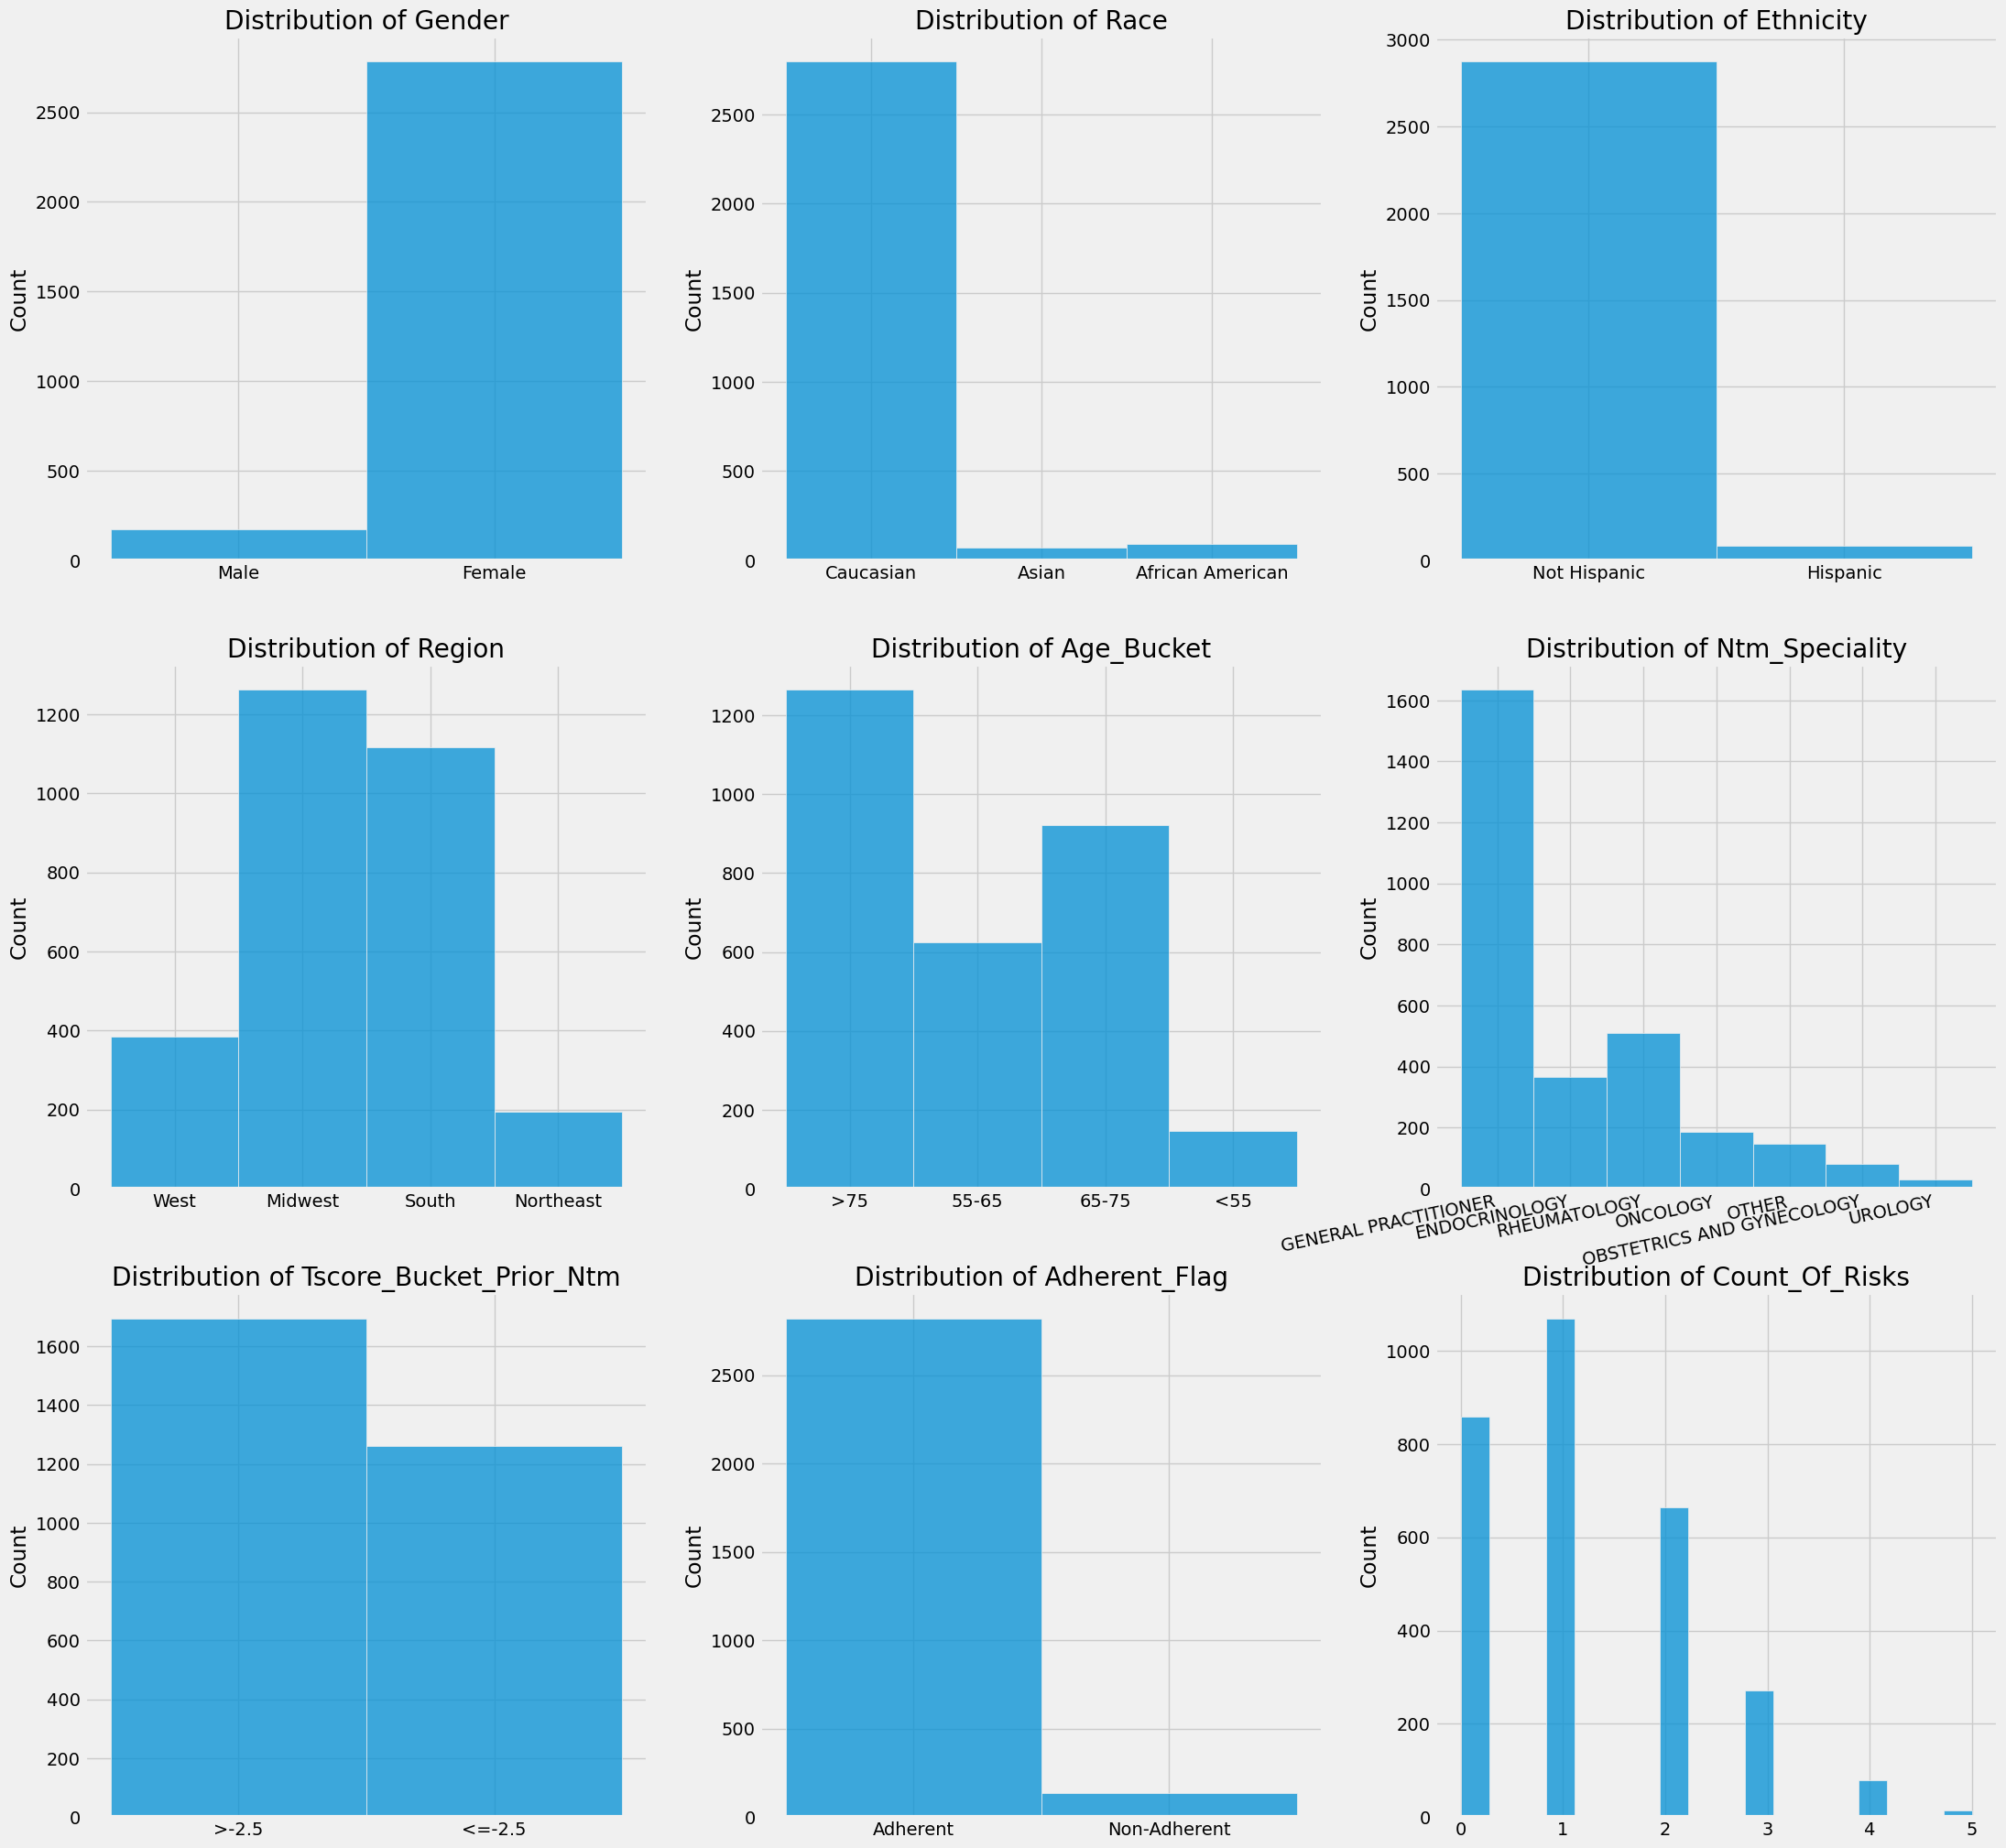

In [148]:
# Distribution of several numerical columns
fig, axis = plt.subplots(3,3, figsize=(24,24))
ax = axis.flatten()

for i, column in enumerate(categorical_columns):
    sns.histplot(x=column, data=df, ax=ax[i])
    ax[i].set_title(f'Distribution of {column}')
    ax[i].set_xlabel('')

    if column == 'Ntm_Speciality':
        ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=12, ha='right')

plt.show()

> * Women in both groups make up the majority of the sample.
> * The majority of patients are Caucasian, with a small number of patients of other races.
> * The majority of patients are not Hispanic.
> * Patients predominantly live in the Midwest and South regions, with the fewest patients in the Northeast.
> * The majority of patients are over 75 years old, a significant number also in the age groups 55-65 and 65-75 years.
> * Patients are most often seen by General Practitioner and Rheumatology, with fewer patients by doctors of other specialties.
> * Most patients have a T-score above -2.5, indicating healthier bone density.
> * The number of patients following the prescriptions is higher compared to those who do not follow the prescriptions.
> * Most patients have 0 to 2 risks, with the highest concentration at 1 risk, and only a few patients have 4 or 5 risks.

* #### Categorical columns by Persistency_Flag

##### Gender

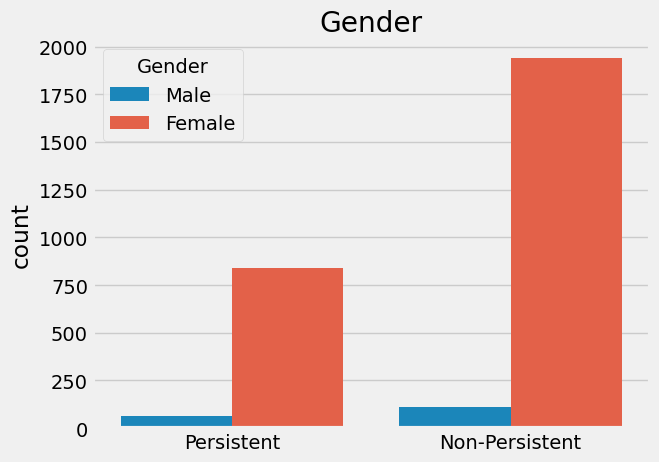

In [96]:
# Gender by Persistency Flag
sns.countplot(data=df, x='Persistency_Flag', hue='Gender')
plt.title('Gender')
plt.xlabel('')
plt.show()

> #### Women significantly predominate among patients in both the Persistent and Non-Persistent groups, but for Persistent group the difference between men and women is less noticeable.

##### Race

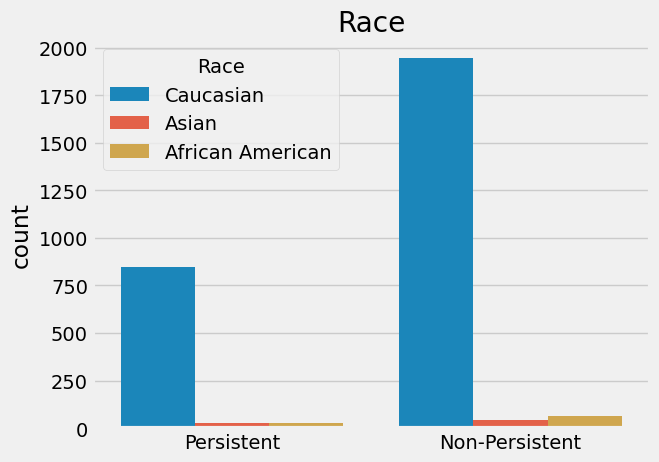

In [97]:
# Race by Persistency Flag
sns.countplot(data=df, x='Persistency_Flag', hue='Race')
plt.title('Race')
plt.xlabel('')
plt.show()

> #### The Caucasian (white race) dominates both Persistent and Non-Persistent groups.
> #### The other races (Asian, African American) are less common and do not show significant differences between the groups.

##### Ethnicity

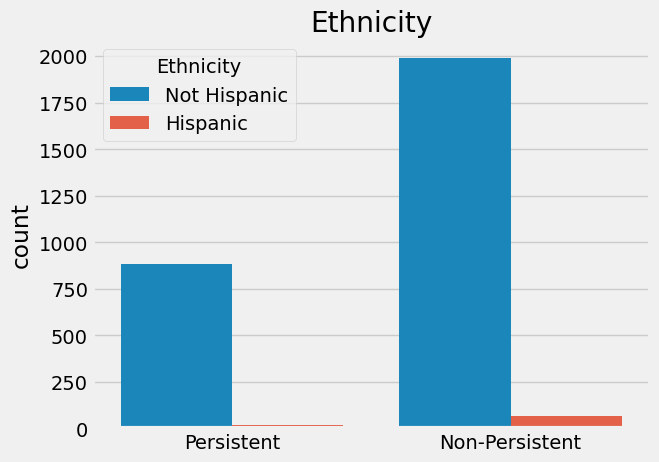

In [98]:
# Ethnicity by Persistency Flag
sns.countplot(data=df, x='Persistency_Flag', hue='Ethnicity')
plt.title('Ethnicity')
plt.xlabel('')
plt.show()

> #### The majority of patients are not Hispanic in both groups.
> #### The Non-Persistent group has slightly more Hispanic patients compared to the Persistent group.

##### Region

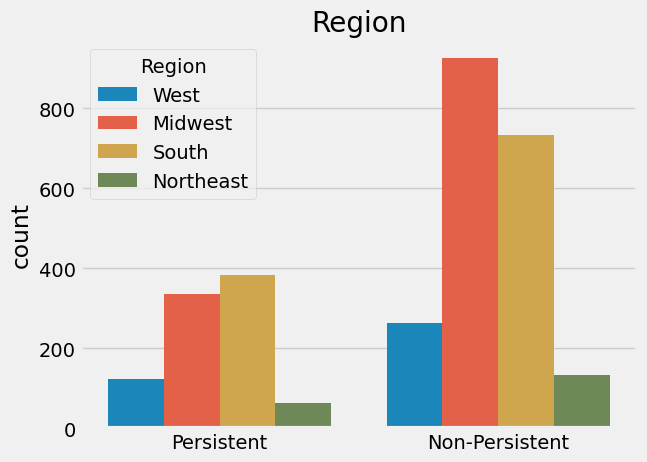

In [99]:
# Region by Persistency Flag
sns.countplot(data=df, x='Persistency_Flag', hue='Region')
plt.title('Region')
plt.xlabel('')
plt.show()

> #### There are more patients in the Midwest and South regions, both Persistent and Non-Persistent.

##### Age_Bucket

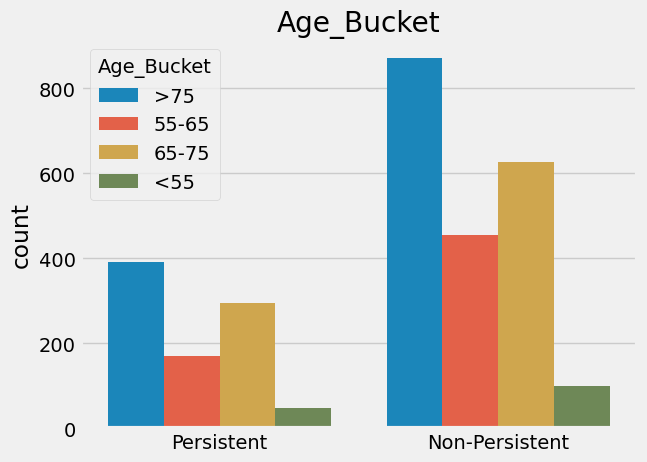

In [100]:
# Age_Bucket by Persistency Flag
sns.countplot(data=df, x='Persistency_Flag', hue='Age_Bucket')
plt.title('Age_Bucket')
plt.xlabel('')
plt.show()

> #### The Persistent and Non-Persistent groups are dominated by patients over the age of 75.

##### Ntm_Speciality

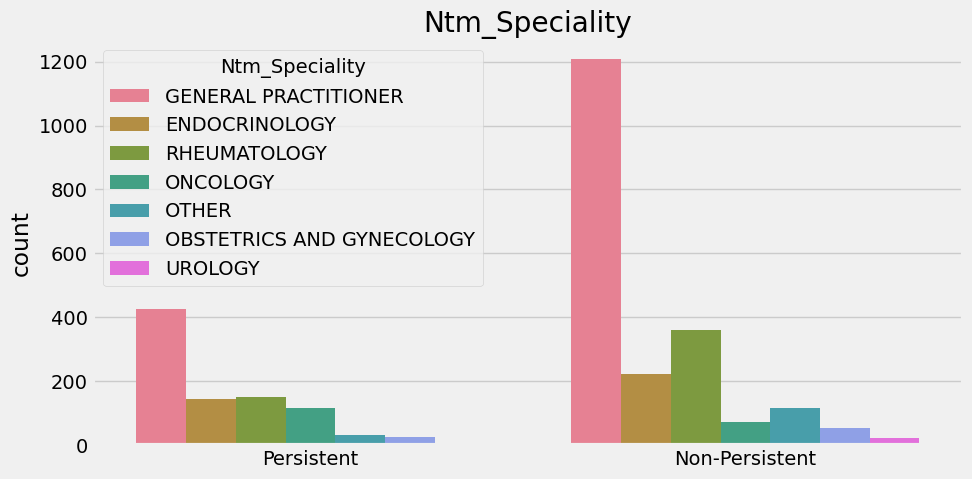

In [104]:
# Ntm_Speciality by Persistency Flag
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Persistency_Flag', hue='Ntm_Speciality')
plt.title('Ntm_Speciality')
plt.xlabel('')
plt.show()

> #### General Practitioner speciality prevail in both groups.

##### Tscore_Bucket_Prior_Ntm

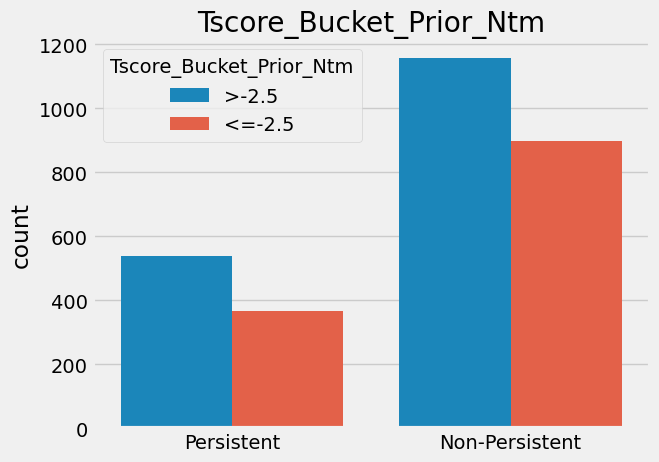

In [106]:
# Tscore_Bucket_Prior_Ntm by Persistency Flag
sns.countplot(data=df, x='Persistency_Flag', hue='Tscore_Bucket_Prior_Ntm')
plt.title('Tscore_Bucket_Prior_Ntm')
plt.xlabel('')
plt.show()

> #### Patients with T score_Bucket_Prior_Tm > -2.5 have a higher chance of drug being non-persistent.

##### Adherent_Flag

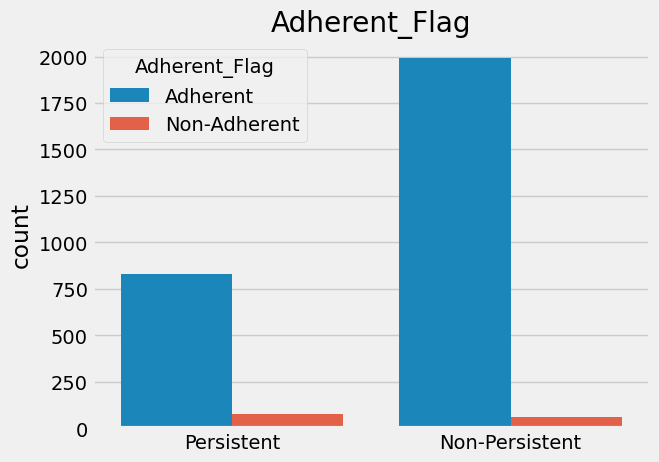

In [108]:
# Adherent_Flag by Persistency Flag
sns.countplot(data=df, x='Persistency_Flag', hue='Adherent_Flag')
plt.title('Adherent_Flag')
plt.xlabel('')
plt.show()

> #### Both groups Persistent and Non-Persistent have significantly more patients who follow the prescriptions (Adherent).

> #### Relationship between categories:
__Adherent and Persistent:__
Patients who follow the prescriptions and continue treatment for a long time.

__Adherent and Non-Persistent:__
Patients who follow the prescriptions, but for some reason do not continue treatment for a long time (for example, due to side effects, financial problems or a change in the treatment plan).

__Non-Adherent and Persistent:__
Patients who do not always follow the prescriptions, but continue treatment for a long time (for example, they may skip doses, but generally remain on treatment).

__Non-Adherent and Non-Persistent:__
Patients who do not follow the prescriptions and do not continue treatment for a long time.

##### Count_Of_Risks

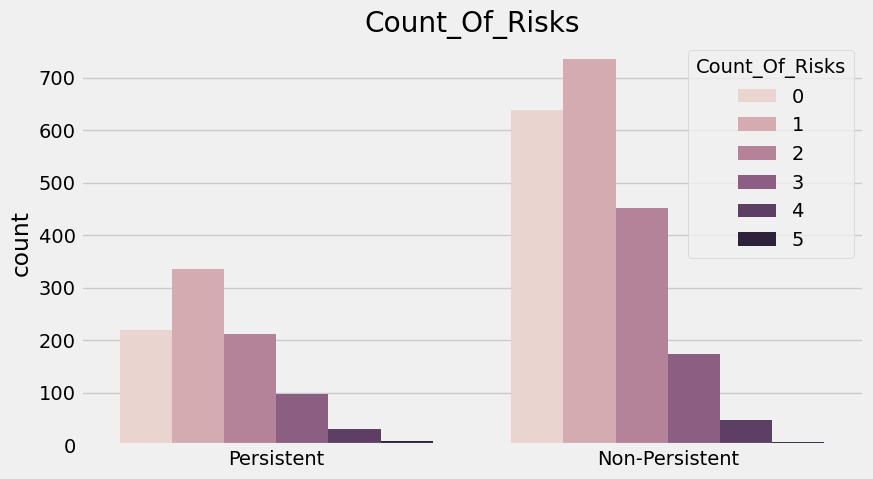

In [112]:
# Count_Of_Risks by Persistency Flag
plt.figure(figsize=(9,5))
sns.countplot(data=df, x='Persistency_Flag', hue='Count_Of_Risks')
plt.title('Count_Of_Risks')
plt.xlabel('')
plt.show()

> #### Patients with 0, 1 and 2 risks predominate in both Persistent and Non-Persistent groups with the highest concentration at 1 risk.

##### Injectable_Experience_During_Rx

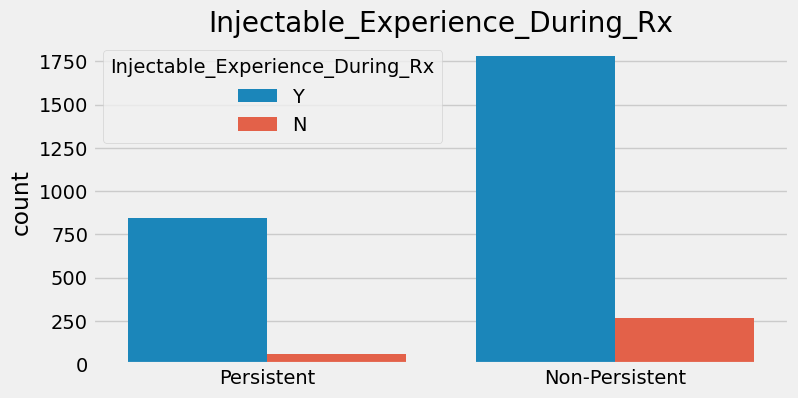

In [118]:
# Injectable_Experience_During_Rx by Persistency Flag
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Persistency_Flag', hue='Injectable_Experience_During_Rx')
plt.title('Injectable_Experience_During_Rx')
plt.xlabel('')
plt.show()

> #### In both the Persistent and Non-Persistent groups most patients have experience with injection therapy.

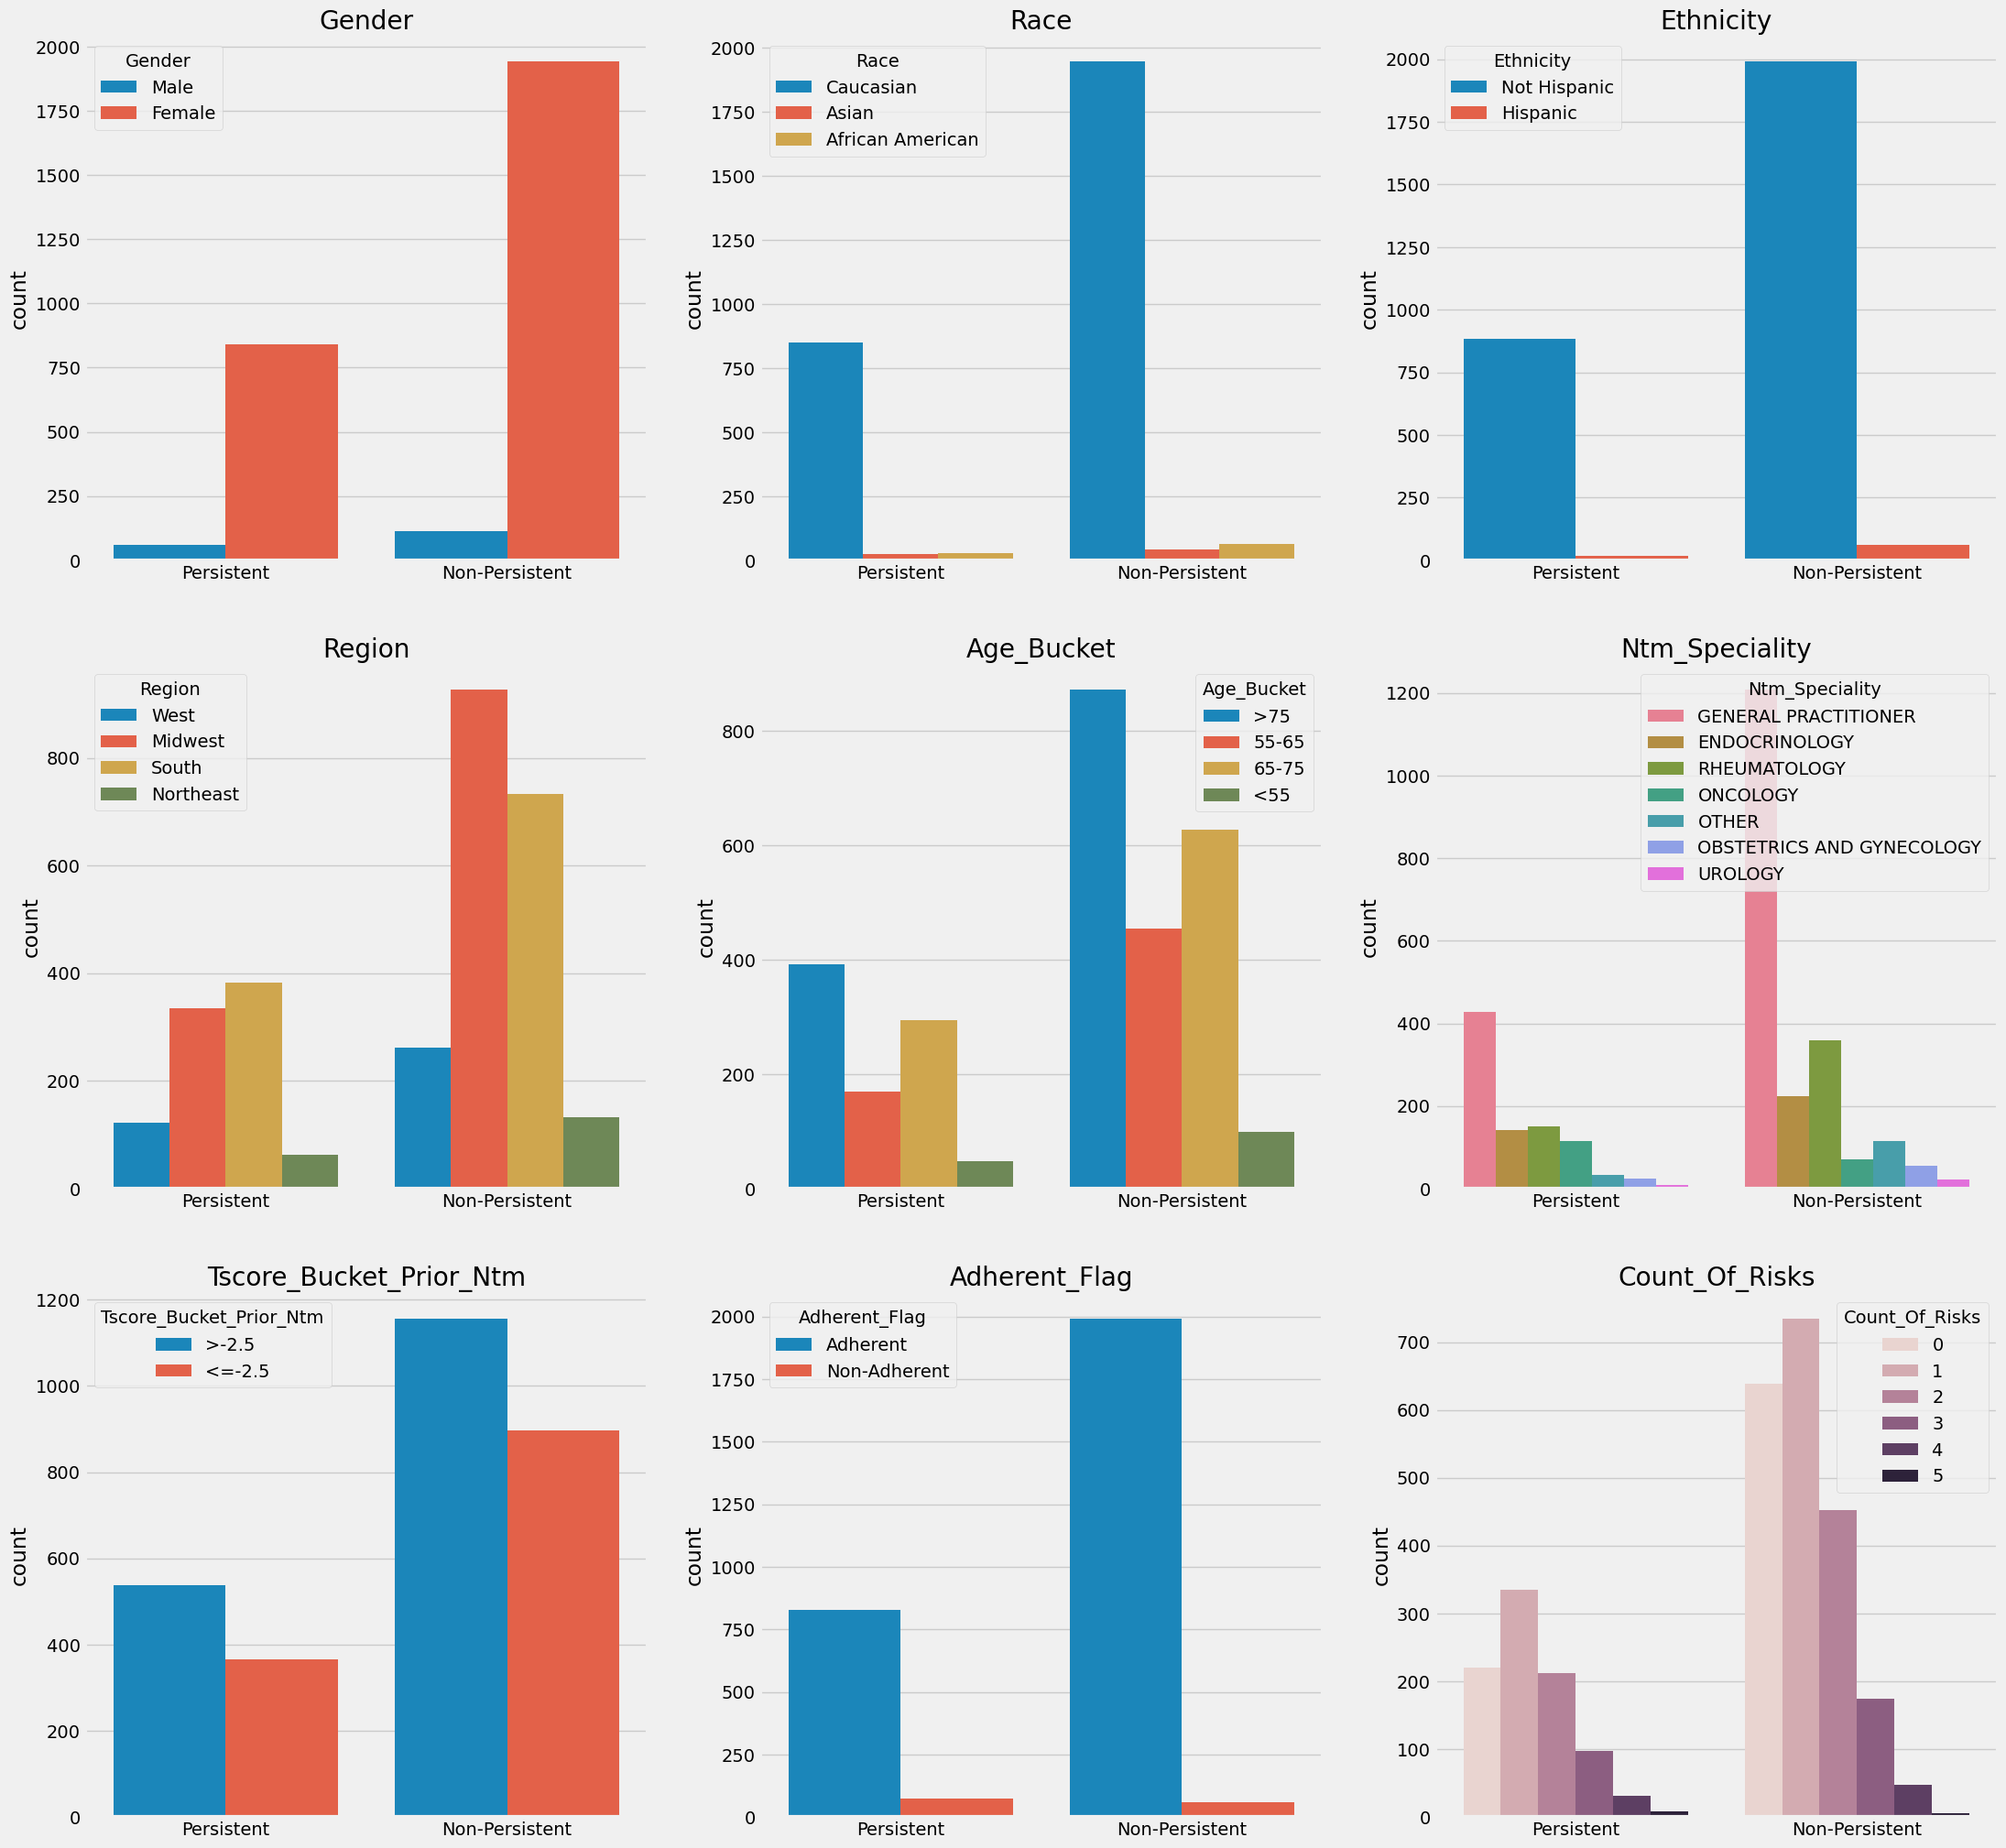

In [55]:
# Distribution of several numerical columns
fig, axis = plt.subplots(3,3, figsize=(24,24))
ax = axis.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(data=df, x='Persistency_Flag', hue=column, ax=ax[i])
    ax[i].set_title(f'{column}')
    ax[i].set_xlabel('')

plt.show()

## 3.3. Data preprocessing

* ### Train/val/test splitting

In [3]:
X = df.drop(columns=['Persistency_Flag'])
y = df['Persistency_Flag']

In [4]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=26, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.18, random_state=26, stratify=y_train_temp)

X_train.shape, X_val.shape, X_test.shape

((2059, 64), (453, 64), (444, 64))

* ### Encoding

##### Ordinal Encoding

In [5]:
ord_enc = OrdinalEncoder(categories=[['<55', '55-65', '65-75', '>75']])

X_train['Age_Bucket'] = ord_enc.fit_transform(X_train[['Age_Bucket']]).astype(int)
X_val['Age_Bucket'] = ord_enc.transform(X_val[['Age_Bucket']]).astype(int)
X_test['Age_Bucket'] = ord_enc.transform(X_test[['Age_Bucket']]).astype(int)

##### Label Encoding

In [6]:
lab_enc = LabelEncoder()

y_train = lab_enc.fit_transform(y_train)
y_val = lab_enc.transform(y_val)
y_test = lab_enc.transform(y_test)

##### One-Hot Encoding

In [7]:
# All columns except numerical columns and the one, which was Ordinal encoded
columns_to_ohe_encode = X_train.drop(columns=['Age_Bucket', 'Count_Of_Risks', 'Dexa_Freq_During_Rx']).columns

ohe = OneHotEncoder(sparse_output=False, drop='first') # Set sparse_output=False to get a regular array
ohe.fit(X_train[columns_to_ohe_encode])

OneHotEncoder(drop='first', sparse_output=False)

In [8]:
# Train data
X_train_encoded = ohe.transform(X_train[columns_to_ohe_encode])

# Get the names of the new columns
encoded_column_names = ohe.get_feature_names_out(columns_to_ohe_encode)

X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_column_names)

X_train_encoded.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)

X_train = pd.concat([X_train, X_train_encoded], axis=1)

# Delete the old columns
X_train.drop(columns=columns_to_ohe_encode, inplace=True)

In [9]:
# Val data
X_val_encoded = ohe.transform(X_val[columns_to_ohe_encode])

X_val_encoded = pd.DataFrame(X_val_encoded, columns=encoded_column_names)

X_val_encoded.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)

X_val = pd.concat([X_val, X_val_encoded], axis=1)

# Delete the old columns
X_val.drop(columns=columns_to_ohe_encode, inplace=True)

In [10]:
# Test data
X_test_encoded = ohe.transform(X_test[columns_to_ohe_encode])

X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_column_names)

X_test_encoded.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

X_test = pd.concat([X_test, X_test_encoded], axis=1)

# Delete the old columns
X_test.drop(columns=columns_to_ohe_encode, inplace=True)

In [11]:
X_train.head()

,Age_Bucket,Dexa_Freq_During_Rx,Count_Of_Risks,Gender_Male,Race_Asian,Race_Caucasian,Ethnicity_Not Hispanic,Region_Northeast,Region_South,Region_West,...,Risk_Chronic_Liver_Disease_Y,Risk_Family_History_Of_Osteoporosis_Y,Risk_Low_Calcium_Intake_Y,Risk_Vitamin_D_Insufficiency_Y,Risk_Poor_Health_Frailty_Y,Risk_Excessive_Thinness_Y,Risk_Hysterectomy_Oophorectomy_Y,Risk_Estrogen_Deficiency_Y,Risk_Immobilization_Y,Risk_Recurring_Falls_Y
0,1,5,3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,7,4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,0,3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2,0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Rename columns to remove potentially problematic characters
X_train.columns = X_train.columns.str.replace('[,()]+', '', regex=True).str.replace('[^A-Za-z0-9_]+', '_', regex=True)
X_val.columns = X_val.columns.str.replace('[,()]+', '', regex=True).str.replace('[^A-Za-z0-9_]+', '_', regex=True)
X_test.columns = X_test.columns.str.replace('[,()]+', '', regex=True).str.replace('[^A-Za-z0-9_]+', '_', regex=True)

* ### Scaling - we will not perform scaling, as all our columns have a small range of values

# <font color = #32CD32> Part 4 - Modeling</font>

* ### Logistic regression
* ### SVM
* ### Decision Tree
* ### Random Forest
* ### LGBM
* ### KNN

In [49]:
models = {
    'Logistic regression': LogisticRegression(random_state=26),
    'SVM': SVC(random_state=26),
    'Decision tree': DecisionTreeClassifier(random_state=26),
    'Random forest': RandomForestClassifier(random_state=26),
    'LGBM': LGBMClassifier(random_state=26),
    'KNN': KNeighborsClassifier()
}

In [55]:
param_grid = {
    'Logistic regression': {'C': [0.1, 1]},
    'SVM': {'C': [0.1, 1], 'kernel': ['linear', 'rbf']},
    'Decision tree': {'max_depth': [10, 20]},
    'Random forest': {'n_estimators': [100, 200], 'max_depth': [10, 20]},
    'LGBM': {'n_estimators': [100, 150], 'num_leaves': [32, 40], 'learning_rate': [0.01, 0.1]},
    'KNN': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
}

In [56]:
best_models = {}
best_scores = {}

for model_name, model in models.items():
    print(f"Running GridSearchCV for {model_name}")

    # GridSearchCV with training on X_train and evaluation on X_val
    grid = GridSearchCV(model, param_grid[model_name], cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)

    y_val_pred = grid.predict(X_val)
    val_score = f1_score(y_val, y_val_pred)
    
    print(f'{model_name} Best F1 Score on X_val: {val_score:.4f}')
    print(f'Best Params: {grid.best_params_}')
    
    # Save the best model and its F1-score
    best_models[model_name] = grid.best_estimator_
    best_scores[model_name] = val_score

Running GridSearchCV for Logistic regression
Logistic regression Best F1 Score on X_val: 0.6426
Best Params: {'C': 1}
Running GridSearchCV for SVM
SVM Best F1 Score on X_val: 0.6337
Best Params: {'C': 1, 'kernel': 'linear'}
Running GridSearchCV for Decision tree
Decision tree Best F1 Score on X_val: 0.5736
Best Params: {'max_depth': 10}
Running GridSearchCV for Random forest
Random forest Best F1 Score on X_val: 0.6255
Best Params: {'max_depth': 20, 'n_estimators': 200}
Running GridSearchCV for LGBM
[LightGBM] [Info] Number of positive: 629, number of negative: 1430
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 146
[LightGBM] [Info] Number of data points in the train set: 2059, number of used features: 67
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.305488 -> initscore=-0.821

# <font color = #32CD32> Part 5 - Evaluation</font>


Evaluating Logistic regression on test data


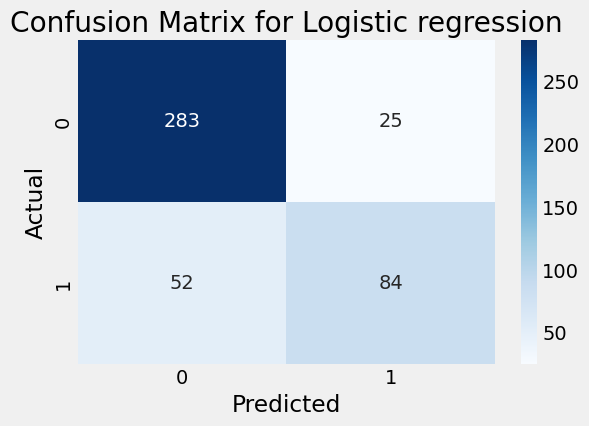

Classification Report for Logistic regression:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       308
           1       0.77      0.62      0.69       136

    accuracy                           0.83       444
   macro avg       0.81      0.77      0.78       444
weighted avg       0.82      0.83      0.82       444


Evaluating SVM on test data


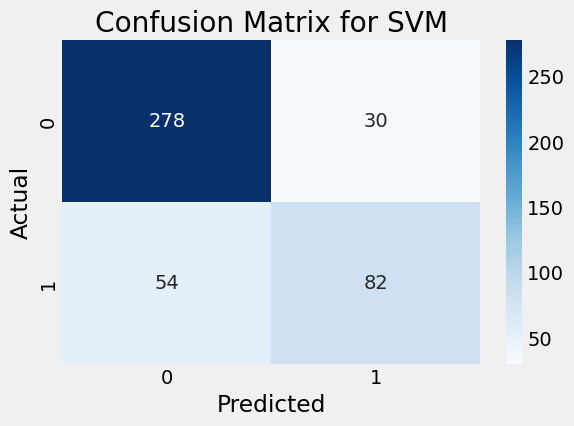

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       308
           1       0.73      0.60      0.66       136

    accuracy                           0.81       444
   macro avg       0.78      0.75      0.77       444
weighted avg       0.81      0.81      0.81       444


Evaluating Decision tree on test data


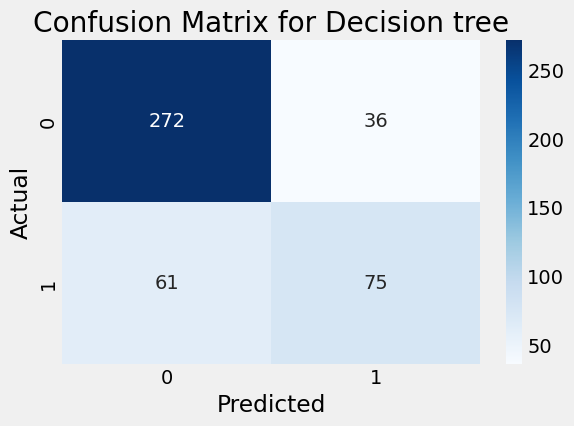

Classification Report for Decision tree:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       308
           1       0.68      0.55      0.61       136

    accuracy                           0.78       444
   macro avg       0.75      0.72      0.73       444
weighted avg       0.77      0.78      0.77       444


Evaluating Random forest on test data


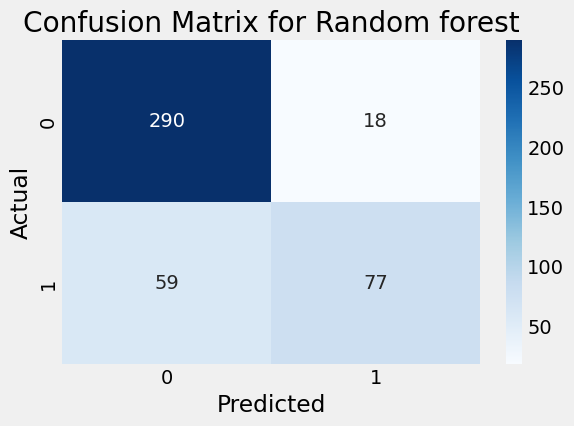

Classification Report for Random forest:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       308
           1       0.81      0.57      0.67       136

    accuracy                           0.83       444
   macro avg       0.82      0.75      0.77       444
weighted avg       0.82      0.83      0.82       444


Evaluating LGBM on test data


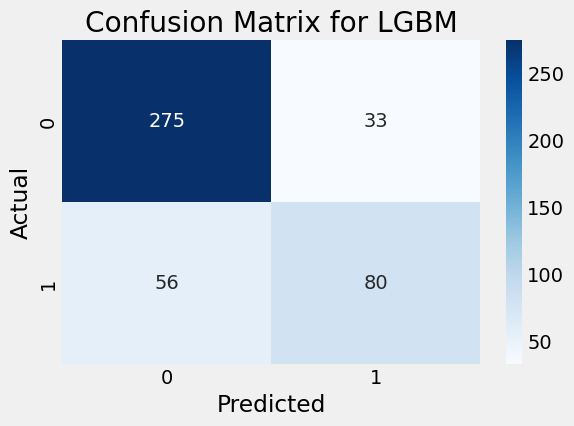

Classification Report for LGBM:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       308
           1       0.71      0.59      0.64       136

    accuracy                           0.80       444
   macro avg       0.77      0.74      0.75       444
weighted avg       0.79      0.80      0.79       444


Evaluating KNN on test data


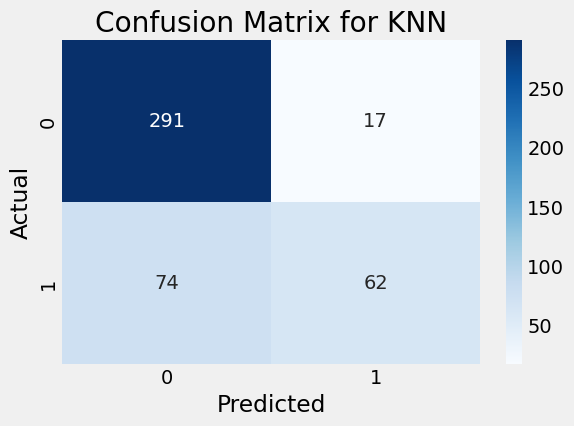

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       308
           1       0.78      0.46      0.58       136

    accuracy                           0.80       444
   macro avg       0.79      0.70      0.72       444
weighted avg       0.79      0.80      0.78       444



In [58]:
for model_name, model in best_models.items():
    print(f"\nEvaluating {model_name} on test data")
    
    # Predictions on the test set
    y_test_pred = model.predict(X_test)
    
    # confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # classification report
    cr = classification_report(y_test, y_test_pred)
    print(f'Classification Report for {model_name}:\n{cr}')

> ### The best performing model turned out to be __Logistic regression__ with __F1 Score 0.82__ on test set. So, let's move on to interpreting the model's decisions.

### Feature importance

In [69]:
# Get the best coefficients of the logistic regression model
best_model = best_models['Logistic regression']
coefficients = best_model.coef_[0]

# Create a DataFrame for clarity
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

# Sort by the absolute value of the coefficients and keep only the necessary columns
feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

print(feature_importance.head(10))

                                              Feature  Coefficient
12                            Ntm_Speciality_ONCOLOGY     1.061145
53                            Concom_Viral_Vaccines_Y     0.901374
26                       Tscore_Bucket_During_Rx__2_5    -0.856641
36            Comorb_Long_Term_Current_Drug_Therapy_Y     0.819393
58              Risk_Untreated_Chronic_Hypogonadism_Y     0.740603
67                         Risk_Poor_Health_Frailty_Y    -0.735466
21                                   Dexa_During_Rx_Y    -0.725776
8                                        Region_South     0.719696
32  Comorb_Encntr_For_General_Exam_W_O_Complaint_S...     0.705771
39  Comorb_Other_Disorders_Of_Bone_Density_And_Str...     0.691147


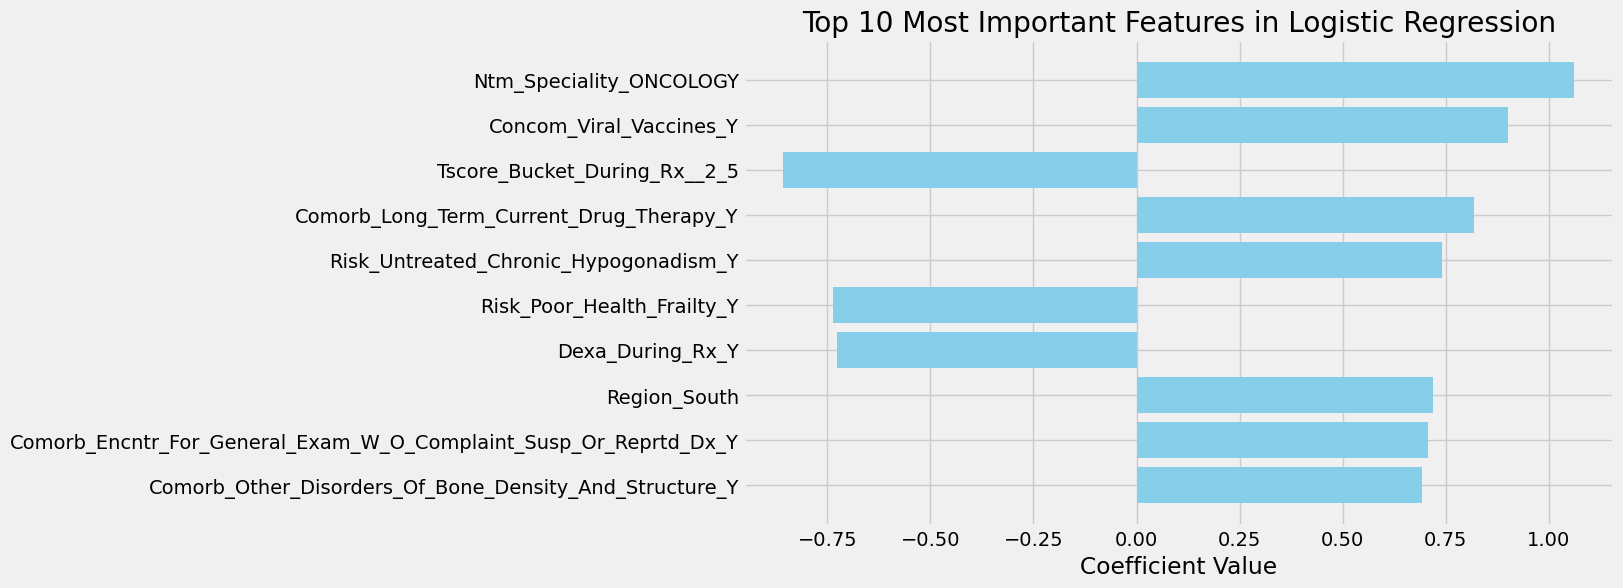

In [64]:
# Visualization of the 10 most important features
top_n = 10
top_features = feature_importance.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title(f'Top {top_n} Most Important Features in Logistic Regression')
plt.gca().invert_yaxis()  # The most important features are at the top
plt.show()

### Analysis of important features:
* > #### The most important features of the model include the patient's belonging to the specialty "Oncology" (__Ntm_Speciality_ONCOLOGY__), receiving viral vaccines (__Concom_Viral_Vaccines_Y__), undergoing long-term current drug therapy (__Comorb_Long_Term_Current_Drug_Therapy_Y__), and having untreated chronic hypogonadism (__Risk_Untreated_Chronic_Hypogonadism_Y__), which significantly increase the probability of a positive outcome.
* > #### Negative coefficients indicate the negative impact of a health condition, such as T-score results (__Tscore_Bucket_During_Rx__2_5__), poor health frailty (__Risk_Poor_Health_Frailty_Y__), and Dexa scan during treatment (__Dexa_During_Rx_Y__) on the outcome.
* > #### The region of residence (__Region_South__) and specific medical examinations (__Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx_Y__, __Comorb_Other_Disorders_Of_Bone_Density_And_Structure_Y__) also influence the predictions of the model, though to a lesser extent.

#### These results highlight the importance of taking into account medical and regional factors when assessing the likelihood of certain outcomes and developing a treatment strategy.